In [201]:
#windows commend line
#pip install tushare
#pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

import tushare as ts
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import mpl_finance as mpf
import seaborn as sns
from matplotlib.pylab import date2num

In [202]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # chinese characters
# initialize connector
ts.set_token('d9518700e1f53a983f1e81000a567df4a84fefe6609ec92d8a4036c6')
pro = ts.pro_api()

In [203]:
df = ts.get_k_data('002594', start='2009-01-01', end='2021-01-11')
df_copy1 = df
df_copy1.head()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2011-06-30,21.663,25.060,25.789,21.663,562925.0,002594
1,2011-07-01,25.375,27.571,27.571,24.617,335612.0,002594
2,2011-07-04,28.438,30.328,30.328,28.142,219645.0,002594
3,2011-07-05,32.278,32.544,33.361,31.401,381080.0,002594
4,2011-07-06,32.297,32.888,35.005,31.618,312967.0,002594


In [204]:
# import dataframe into excel file
# df.to_excel('stock_data.xlsx', index=False) 

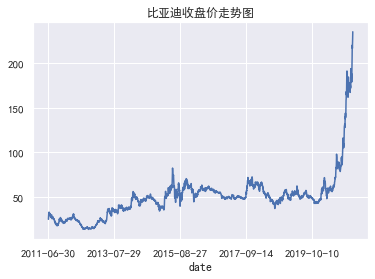

In [205]:
# visualize the dataframe close/date using panda.plot
df_copy1.set_index('date', inplace=True)
df_copy1['close'].plot(title='比亚迪收盘价走势图')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


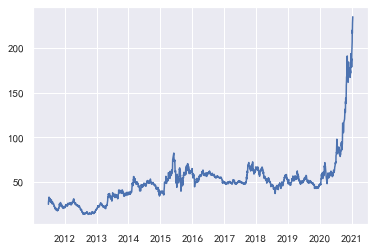

In [206]:
df = ts.get_k_data('002594', start='2009-01-01', end='2021-01-11')
# visualize the dataframe using Matplotlib

# covert date type to timestamp
df['date'] = df['date'].apply(\
lambda x:datetime.strptime(x, '%Y-%m-%d'))

# plot
plt.plot(df['date'], df['close'])
plt.show()

In [207]:
'''
绘制K线图的candlestick_ochl()函数只能读取数组格式的数据，
并且其中的日期数据要为特定的数字格式
'''

'\n绘制K线图的candlestick_ochl()函数只能读取数组格式的数据，\n并且其中的日期数据要为特定的数字格式\n'

In [208]:
print(df_arr[:,0])

[734318.0 734319.0 734322.0 ... 737797.0 737798.0 737801.0]


In [209]:
# 5日均线 MA5 = (Close1＋Close2＋Close3＋Close4＋Close5) / 5

# 将Tushare库获取到的日期数据转换成candlestick_ochl()函数可读取的格式
def date_to_num(dates):
    num_time = []
    for date in dates:
        #可能要调整为 datetime.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
        date_time = datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time

# 将DataFrame转换为二维数组, 并利用date_to_num()函数转换日期格式
df_arr = df.values  # 将DataFrame格式的数据转换为二维数组
df_arr[:,0] = date_to_num(df_arr[:,0])  # 将二维数组中的日期(每行的0位)转换成数字格式

In [210]:
print(df_arr[0:5])

[[734318.0 21.663 25.06 25.789 21.663 562925.0 '002594']
 [734319.0 25.375 27.571 27.571 24.617 335612.0 '002594']
 [734322.0 28.438 30.328 30.328 28.142 219645.0 '002594']
 [734323.0 32.278 32.544 33.361 31.401 381080.0 '002594']
 [734324.0 32.297 32.888 35.005 31.618 312967.0 '002594']]


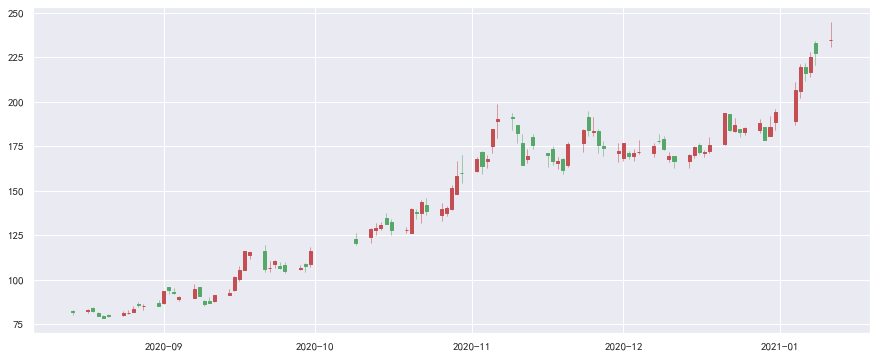

In [211]:
fig, ax = plt.subplots(figsize=(15, 6))
mpf.candlestick_ochl(ax, df_arr[-100:], width=0.6, colorup='r', \
colordown='g', alpha=1.0)  # 绘制K线图
plt.grid(True)  # 绘制网格线
ax.xaxis_date()  # 设置x轴的刻度格式为常规日期格式

In [212]:
# add MA5, MA10 data into dataframe
df['MA5'] = df['close'].rolling(5).mean()
df['MA10'] = df['close'].rolling(10).mean()
df['MA20'] = df['close'].rolling(20).mean()

#print(df.loc[1500:1600,['MA5','MA10'] ])
#print(df.loc[1500:1600,['date'] ])  # = print(df.iloc[1500:1600,0 ])

print(df.tail(10)[['MA5','MA10','MA20']])

          MA5     MA10      MA20
2298  185.388  181.490  176.8815
2299  184.308  181.880  176.9710
2300  184.150  183.293  177.7835
2301  186.410  185.544  178.9440
2302  190.718  188.620  180.6890
2303  197.112  191.250  182.9195
2304  204.652  194.480  184.8360
2305  212.460  198.305  187.4260
2306  219.102  202.756  190.3255
2307  224.722  207.720  193.7185


In [213]:
print(len(df_arr[-100:,0])) 
#第0列是数字格式日期(为了配对candlestick_ochl函数)

100


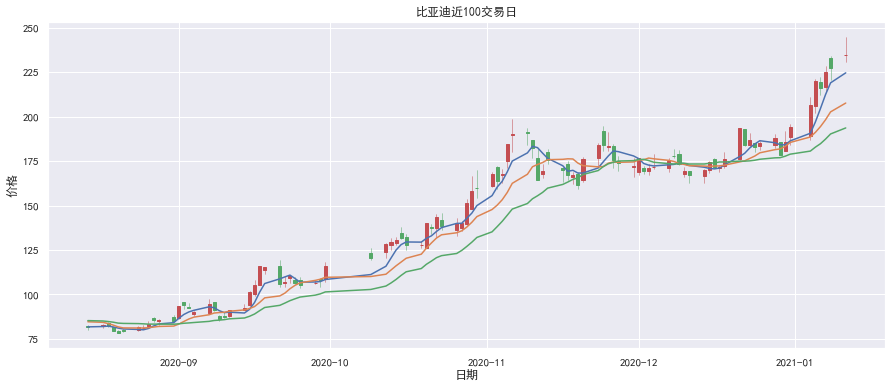

In [214]:
fig, ax = plt.subplots(figsize=(15, 6))

#仅绘制最后100天的数据[-100,0]
mpf.candlestick_ochl(ax, df_arr[-100:], width=0.6, colorup='r', \
colordown ='g', alpha=1.0)  # 绘制K线图

plt.plot(df_arr[-100:,0], df.tail(100)[['MA5']] )  # 绘制5日均线  plt.plot(df_arr[1401:1551,0], df.loc[1401:1550,['MA5'] ]) 
plt.plot(df_arr[-100:,0], df.tail(100)[['MA10']] )  # 绘制10日均线
plt.plot(df_arr[-100:,0], df.tail(100)[['MA20']] )  # 绘制20日均线

plt.grid(True)  # 绘制网格线

plt.title('比亚迪近100交易日')  # 设置图表标题
plt.xlabel('日期')  # 设置x轴标签
plt.ylabel('价格')  # 设置y轴标签 
ax.xaxis_date()  # 设置x轴的刻度格式为常规日期格式

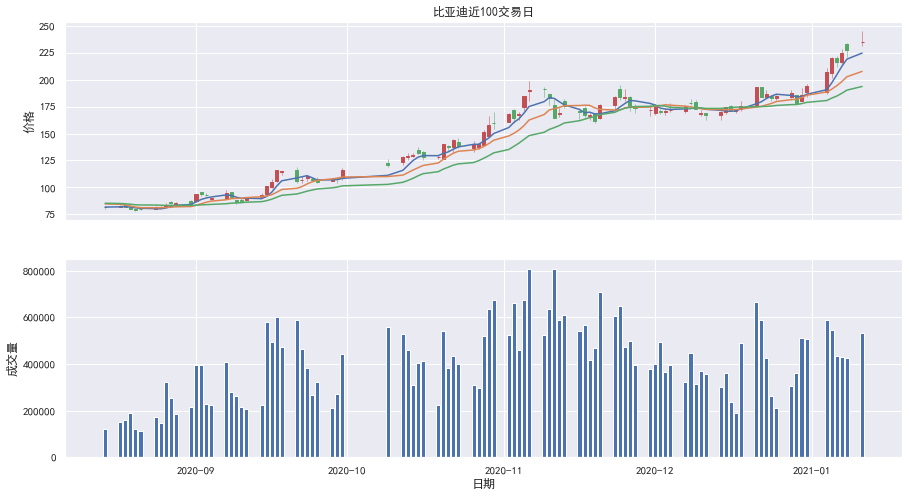

In [216]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
ax1, ax2 = axes.flatten()

# 绘制第1张子图：K线图和均线图
mpf.candlestick_ochl(ax1, df_arr[-100:], width=0.6,\
colorup='r', colordown ='g', alpha=1.0)  # 绘制K线图

ax1.plot(df_arr[-100:,0], df.tail(100)[['MA5']] )  # 绘制5日均线
ax1.plot(df_arr[-100:,0], df.tail(100)[['MA10']] )  # 绘制10日均线
ax1.plot(df_arr[-100:,0], df.tail(100)[['MA20']] )  # 绘制20日均线

ax1.set_title('比亚迪近100交易日')  # 设置子图的标题
ax1.set_ylabel('价格')  # 设置子图的y轴标签
ax1.grid(True)
ax1.xaxis_date()

# 绘制第2张子图：每日成交量柱形图
ax2.bar(df_arr[-100:,0], df_arr[-100:,5])  # 绘制每日成交量柱形图
ax2.set_xlabel('日期')  # 设置子图的x轴标签
ax2.set_ylabel('成交量')  # 设置子图的y轴标签
ax2.grid(True)
ax2.xaxis_date()